<h1 style = "color : #3D737D; text-align : center;"><em>City Hospital</em> - Data Preprocessing & Exploratory Analysis</h1>
<br>
<p style = "font-size : 12px; text-align: center;"><b>NOVA IMS</b></p>
<p style = "font-size : 10px; text-align: center;">Data Preprocessing and Visualization</p>
<p style = "font-size : 10px; text-align: center;">GROUP 8: Diogo Gonçalves, João Marques, Juan Mendes & Gustavo Franco</p>
<br>

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Project Setup & Data Loading</h2>

<h3  style = "color : #3D737D;"> Imports</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

<h3  style = "color : #3D737D;"> Dataset Assessment</h3>

<p style = "font-size : 15px;">Reading of dataset from <code>Project Data.xlsx</code> file</p>

In [3]:
project_data = pd.read_excel('Project Data.xlsx')

In [4]:
project_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        9952 non-null   float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         8098 non-null   object        
 6   Family History             8015 non-null   object        
 7   Education Level            9979 non-null   object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

In [6]:
project_data.shape

(10008, 16)

In [7]:
project_data.describe()

,Patient ID,Age,Visit Date,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,10008.000000,9952.000000,10008,10008.000000,10008.000000,9.854000e+03,10008.000000,9958.000000
mean,1251.580735,50.635651,2024-03-31 14:53:14.244604160,67.807654,3.202338,4.340276e+04,187.263022,115.429366
min,1000.000000,0.000000,2024-01-01 00:00:00,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,1127.000000,23.000000,2024-02-15 00:00:00,41.000000,2.000000,3.115775e+04,111.316562,59.692518
50%,1252.000000,52.000000,2024-03-31 00:00:00,68.000000,3.000000,4.087650e+04,159.531115,115.938998
75%,1375.000000,75.000000,2024-05-16 00:00:00,94.000000,5.000000,5.072175e+04,199.820999,165.437958
max,1499.000000,195.000000,2024-06-30 00:00:00,600.000000,6.000000,1.197090e+07,39999.222018,421.887836
std,144.576421,31.185608,NaN,32.447143,1.565507,2.681420e+05,862.865550,79.337759


<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part A - Data Understanding & Cleaning</h2>

<h3 style = "color : #3D737D;">Analysis and Correction of Inconsistencies</h3>
<p style = "font-size : 15px;">Evaluation of each row on the missing values and structure.</p>

In [8]:
categorical_cols = project_data.select_dtypes(include=['object']).columns.tolist()

In [9]:
for col in categorical_cols:
    print(f"\nCOLUMN: {col}")
    print(f"Unique values ({project_data[col].nunique()} unique):")
    print(project_data[col].unique())


COLUMN: Gender
Unique values (3 unique):
['Female' 'Other' 'Male']

COLUMN: City of Residence
Unique values (8 unique):
['Birmingham' 'Edinburgh' 'Glasgow' 'Dublin' 'Manchester' 'Liverpool'
 'Belfast' 'London']

COLUMN: Profession
Unique values (10 unique):
['Retired' 'Lawyer' 'Doctor' 'Nurse' 'Student' 'Artist' 'Teacher'
 'Businessperson' 'Engineer' 'Scientist']

COLUMN: Insurance Provider
Unique values (4 unique):
[nan 'Provider A' 'Provider B' 'Provider C' 'Provider D']

COLUMN: Family History
Unique values (4 unique):
['Heart Disease' 'Diabetes' nan 'Hypertension' 'Cancer']

COLUMN: Education Level
Unique values (8 unique):
['Master' 'Undergraduate' 'Kindergarten' 'Middle school/junior high'
 'High school' 'Pre-school' 'Elementary school' nan 'PhD']

COLUMN: Marital Status
Unique values (4 unique):
['Divorced' 'Married' 'Single' 'Widowed']

COLUMN: Department
Unique values (13 unique):
['Endocrinology' 'Emergency' 'Neurology' 'Orthopedics' 'Psychiatry'
 'Rheumatology' 'Allergology

<p>As we can see, by the unique values of each variable defined as <code>Object</code>, we have no major inconsistencies and missing values are only categorised as <code>nan</code>.

<h4 style = "color : #3D737D;">Missing Values Evaluation</h4>

In [10]:
for col in categorical_cols:
    print(f"\nCOLUMN: {col}")
    print(f"{project_data[col].isna().sum()} missing values.")
    print(f'This represents {(project_data[col].isna().sum()/len(project_data[col]))*100:.2f}% of the total values.')


COLUMN: Gender
0 missing values.
This represents 0.00% of the total values.

COLUMN: City of Residence
0 missing values.
This represents 0.00% of the total values.

COLUMN: Profession
0 missing values.
This represents 0.00% of the total values.

COLUMN: Insurance Provider
1910 missing values.
This represents 19.08% of the total values.

COLUMN: Family History
1993 missing values.
This represents 19.91% of the total values.

COLUMN: Education Level
29 missing values.
This represents 0.29% of the total values.

COLUMN: Marital Status
0 missing values.
This represents 0.00% of the total values.

COLUMN: Department
0 missing values.
This represents 0.00% of the total values.


In [11]:
def outliers_finder(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    left_outliers = col[(col < lower_bound)]
    right_outliers = col[(col > upper_bound)]
    outliers = pd.concat([left_outliers, right_outliers])
    return outliers

In [12]:
new_col = outliers_finder(project_data['Approximate Annual Income'])
new_col

170           0.0
171           0.0
172           0.0
173           0.0
174           0.0
          ...    
9646      88873.0
9651     110405.0
9652      99209.0
9654    1153050.0
9655     105697.0
Name: Approximate Annual Income, Length: 2288, dtype: float64

<h3 style = "color : #3D737D;">Analysis and Correction of Inconsistencies</h3>

##### **Unique Values**

Categotical variables:

- Gender
- City of Residence
- Profession
- Insurance Provider
- Family History
- Education Level
- Marital Status
- Department
- Approximate Annual Income
- Consultation Price
- Insurance Coverage

In [13]:
categorical_variables = [ "Gender", "City of Residence", "Profession", "Insurance Provider", "Family History", "Education Level", "Marital Status", "Department"]

In [14]:
unique_values_df = pd.DataFrame({var : pd.Series(project_data[var].unique()) for var in categorical_variables })
unique_values_df

,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Department
0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,Endocrinology
1,Other,Edinburgh,Lawyer,Provider A,Diabetes,Undergraduate,Married,Emergency
2,Male,Glasgow,Doctor,Provider B,NaN,Kindergarten,Single,Neurology
3,NaN,Dublin,Nurse,Provider C,Hypertension,Middle school/junior high,Widowed,Orthopedics
4,NaN,Manchester,Student,Provider D,Cancer,High school,NaN,Psychiatry
5,NaN,Liverpool,Artist,NaN,NaN,Pre-school,NaN,Rheumatology
6,NaN,Belfast,Teacher,NaN,NaN,Elementary school,NaN,Allergology
7,NaN,London,Businessperson,NaN,NaN,NaN,NaN,ENT
8,NaN,NaN,Engineer,NaN,NaN,PhD,NaN,General Practice
9,NaN,NaN,Scientist,NaN,NaN,NaN,NaN,Cardiology


##### **Satisfaction Levels**

In [15]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1, 6])

In [16]:
project_data["Satisfaction Level"].replace("6", project_data["Satisfaction Level"].mode()[0], inplace = True)

C:\Users\Juan Mendes\AppData\Local\Temp\ipykernel_17128\3754760847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  project_data["Satisfaction Level"].replace("6", project_data["Satisfaction Level"].mode()[0], inplace = True)


In [17]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1, 6])

<h3 style = "color : #3D737D;">Critical Missing Value Analysis & Imputacion</h3>

##### **Percentage of missing values per column**

In [18]:
p_of_m_v = pd.DataFrame(data = [str(project_data[column].isna().sum()/len(project_data[column]))+" %" for column in project_data.columns] , index = project_data.columns, columns = ["Percentage of Missing Values"])
p_of_m_v

,Percentage of Missing Values
Patient ID,0.0 %
Age,0.005595523581135092 %
Gender,0.0 %
City of Residence,0.0 %
Profession,0.0 %
Insurance Provider,0.19084732214228617 %
Family History,0.19914068745003996 %
Education Level,0.002897681854516387 %
Marital Status,0.0 %
Visit Date,0.0 %


##### **Imputation of missing values**

In [19]:
categorical_variables = [ "Gender", "City of Residence", "Profession", "Insurance Provider", "Family History", "Education Level", "Marital Status", "Department"]
numerical_variables = ["Age", "Visit Date", "Consultation Duration", "Satisfaction Level", "Approximate Annual Income", "Consultation Price", "Insurance Coverage"]

categorical_variables_with_NaN = ["Insurance Provider", "Family History", "Education Level"]
numerical_variables_with_NaN = ["Age", "Approximate Annual Income", "Insurance Coverage"]

In [20]:
def treat_NaN_categorical(data, list_to_treat):
    for var in list_to_treat:
        data[var] = data[var].fillna(data[var].mode()[0])

def treat_NaN_numerical(data, list_to_treat):
    for var in list_to_treat:
        data[var] = data[var].fillna(data[var].median())

In [21]:
treat_NaN_categorical(project_data, categorical_variables_with_NaN)
treat_NaN_numerical(project_data, numerical_variables_with_NaN)

In [22]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        10008 non-null  float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         10008 non-null  object        
 6   Family History             10008 non-null  object        
 7   Education Level            10008 non-null  object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

##### **Outliear Analysis and Treatment**

In [23]:
boxplots_list = ["Age", "Consultation Duration", "Approximate Annual Income", "Consultation Price"]

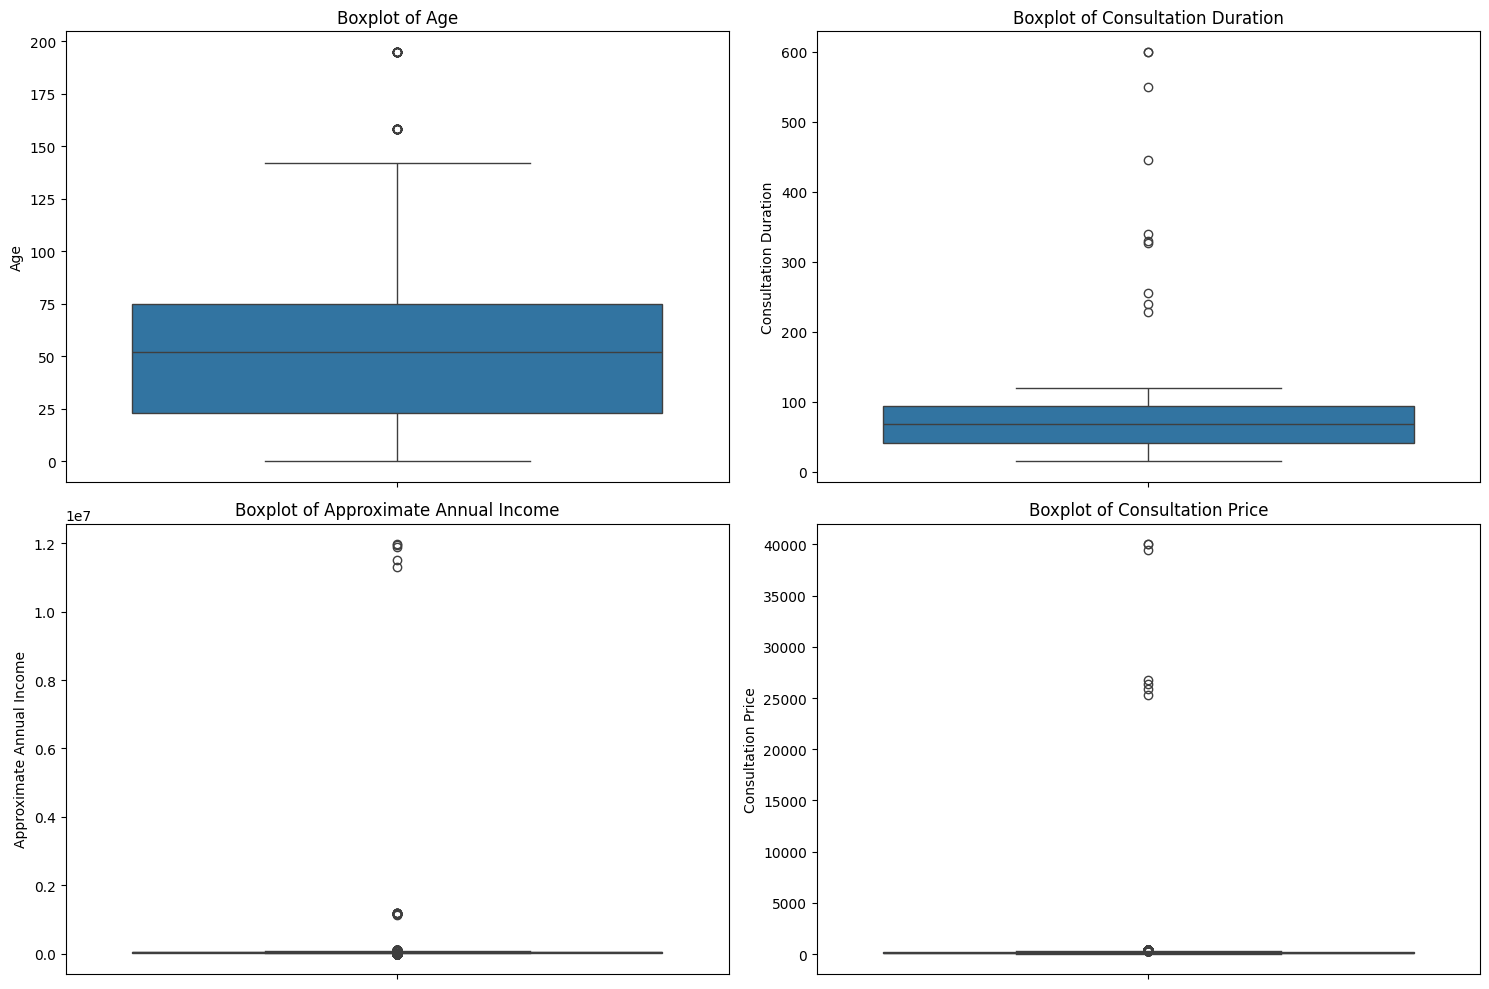

In [24]:
plt.figure(figsize=(15, 10))

for i  in range(len(boxplots_list)):
    col = boxplots_list[i]
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=project_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  
plt.show()

Aggregate all patients with same ID in a single row

In [25]:
project_data_copy=project_data.copy()

In [27]:
Total_Visits = project_data_copy.groupby('Patient ID').size().reset_index(name='Total Visits')
Total_Consultation_Price = project_data_copy.groupby('Patient ID')['Consultation Price'].sum().reset_index(name='Total Consultation Price')
Average_Satisfaction_Level = project_data_copy.groupby('Patient ID')['Satisfaction Level'].mean().reset_index(name='Average Satisfaction Level')
Avg_Consultation_Duration= project_data_copy.groupby('Patient ID')['Consultation Duration'].mean().reset_index(name='Avg Consultation Duration')
project_data_copy.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


In [ ]:
df_id_agg = project_data_copy.groupby("Patient ID").apply(
    lambda g: {
        "Age": g["Age"].iloc[0],
        "Gender": g["Gender"].iloc[0],
        "City of Residence": g["City of Residence"].iloc[0],
        "Profession": g["Profession"].iloc[0],
        "Insurance Provider": g["Insurance Provider"].iloc[0],
        "Family History": g["Family History"].iloc[0],
        "Education Level": g["Education Level"].iloc[0],
        "Marital Status": g["Marital Status"].iloc[0],
        
        "Consultations": g.drop(
            ["Patient ID", "Age", "Gender", "City of Residence", "Profession"],
            axis=1
        ).to_dict("records")
    }
).reset_index()